## Handwriting Recogition

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

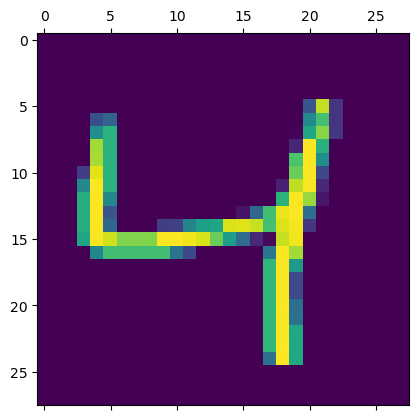

In [4]:
plt.matshow(x_train[2])

In [5]:
y_train[2]

4

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_train_flattened.shape
x_test_flattened.shape

(10000, 784)

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs = 5)

C:\Users\win\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8183 - loss: 0.7022
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9104 - loss: 0.3152
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9197 - loss: 0.2888
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9212 - loss: 0.2821
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9253 - loss: 0.2648


In [9]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9146 - loss: 0.3021


[0.267755925655365, 0.925000011920929]

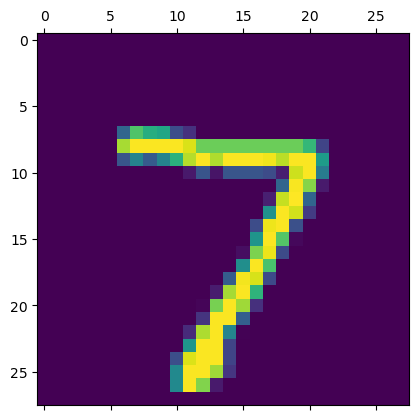

In [10]:
plt.matshow(x_test[0])

In [11]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.2314072e-02, 3.3107665e-07, 6.9873594e-02, 9.6234173e-01,
       3.2648770e-03, 1.0495563e-01, 2.6613900e-06, 9.9981195e-01,
       1.4384282e-01, 7.2310042e-01], dtype=float32)

In [12]:
np.argmax(y_predicted[0])

7

In [13]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [14]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [15]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    6,    2,    3,    1],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   5,    7,  920,   20,    9,    3,   12,   10,   41,    5],
       [   3,    0,   17,  926,    0,   14,    2,   12,   29,    7],
       [   1,    1,    2,    2,  916,    0,   13,    4,   10,   33],
       [   9,    1,    3,   42,   10,  756,   16,    8,   40,    7],
       [  13,    3,    5,    1,    7,   10,  912,    2,    5,    0],
       [   1,    5,   20,    8,    7,    0,    0,  949,    5,   33],
       [   5,    4,    6,   20,    9,   17,    9,   11,  886,    7],
       [   9,    6,    1,    9,   29,    6,    0,   19,   13,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

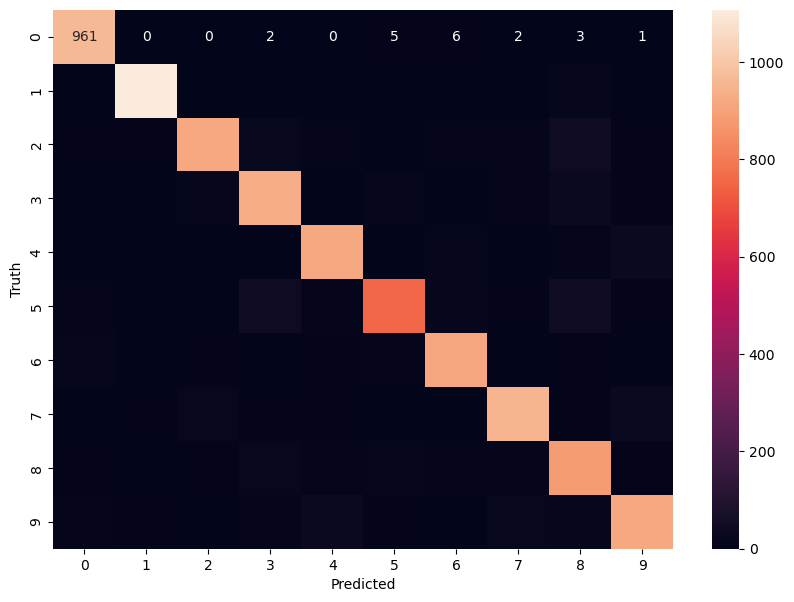

In [17]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')